In [80]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
import os
print(f"Current working directory is : {os.getcwd()}")

Current working directory is : C:\Users\hp\Desktop\Spring_22\Analytics_Vidya\Sales Prediction for Big Mart Outlets


In [82]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [83]:
print(f"Shape of train dataset is {train.shape} and test is {test.shape}")

Shape of train dataset is (8523, 12) and test is (5681, 11)


In [84]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [85]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [86]:
#train['Item_Identifier'] = train['Item_Identifier'].astype('str') 
train = train.astype({"Item_Identifier":'str','Item_Fat_Content':'category', 'Item_Type':'category',
                      'Outlet_Identifier':'str', 'Outlet_Size':'category', 'Outlet_Location_Type':'category', 
                      'Outlet_Type':'category'})

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(5), float64(4), int64(1), object(2)
memory usage: 509.2+ KB


In [88]:
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [89]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [90]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

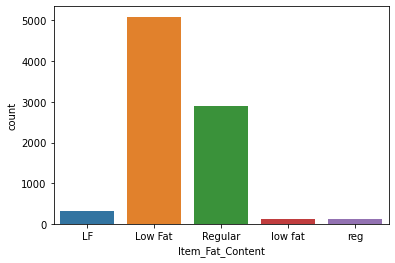

In [91]:
sns.countplot(x='Item_Fat_Content', data = train)

In [92]:
train = train.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'}})

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

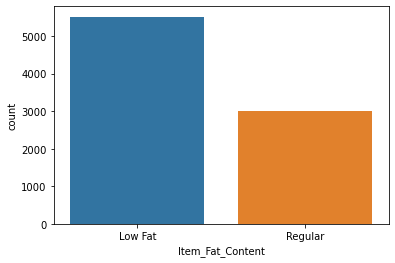

In [93]:
sns.countplot(x='Item_Fat_Content', data = train)

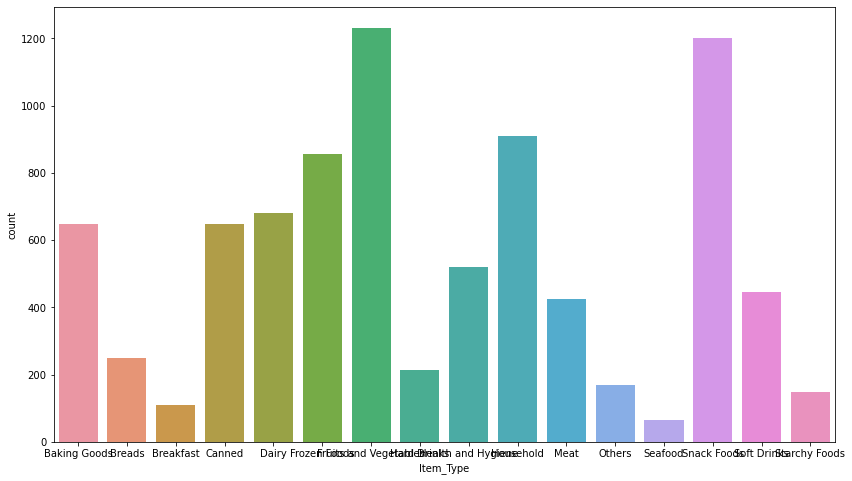

In [94]:
plt.figure(figsize =(14,8))
sns.countplot(x='Item_Type', data = train)
plt.show()

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

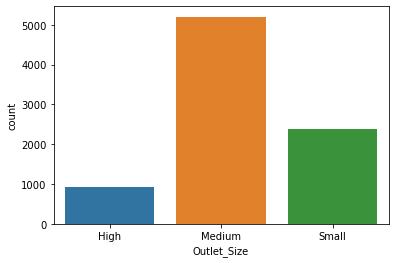

In [95]:
sns.countplot(x='Outlet_Size', data = train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

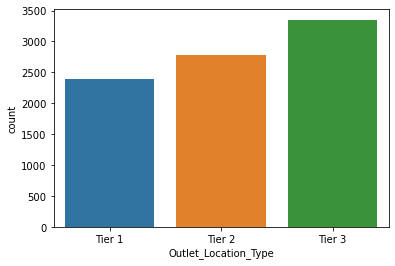

In [96]:
sns.countplot(x='Outlet_Location_Type', data = train)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

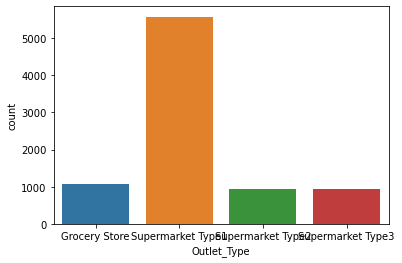

In [97]:
sns.countplot(x='Outlet_Type', data = train)

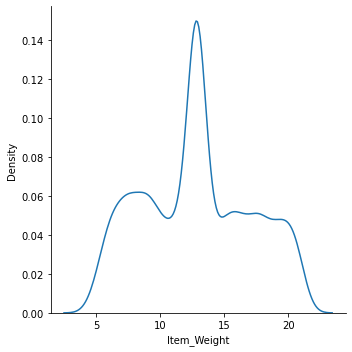

In [98]:
#sns.heatmap(train[numerical_columns])
sns.displot(x='Item_Weight',data=train,kind="kde")

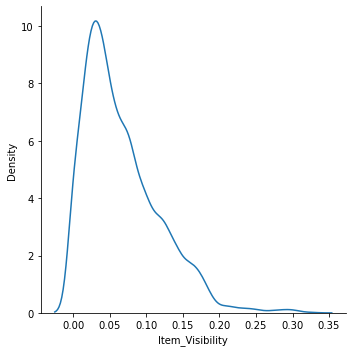

In [99]:
sns.displot(x='Item_Visibility',data=train,kind="kde")

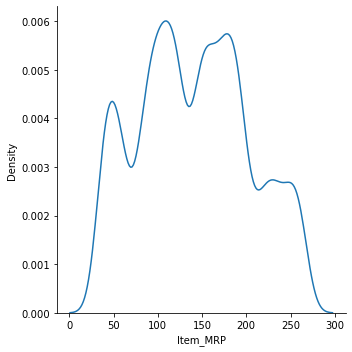

In [100]:
sns.displot(x='Item_MRP',data=train,kind="kde")

In [101]:
train = pd.get_dummies(data= train, columns =categorical_columns)

In [102]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [103]:
from sklearn.preprocessing import StandardScaler
#from sklearn.compose import ColumnTransformer

#ct = ColumnTransformer([])

scaler = StandardScaler()
scaled = scaler.fit_transform(train[numerical_columns])
scaled

array([[-0.84187169, -0.97073217,  1.74745381],
       [-1.64170589, -0.90811123, -1.48902325],
       [ 1.09855449, -0.95691733,  0.01004021],
       ...,
       [-0.53424315, -0.59978449, -0.89720755],
       [-1.33644372,  1.53287976, -0.60797692],
       [ 0.45963367, -0.41193591, -1.05226104]])

In [104]:
scaled.shape

(8523, 3)

In [105]:
train[numerical_columns] = scaled

In [106]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,-0.841872,-0.970732,1.747454,OUT049,1999,3735.1380,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,-1.641706,-0.908111,-1.489023,OUT018,2009,443.4228,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,1.098554,-0.956917,0.010040,OUT049,1999,2097.2700,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,1.500838,-1.281758,0.660050,OUT010,1998,732.3800,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,NCD19,-0.929428,-1.281758,-1.399220,OUT013,1987,994.7052,1,0,0,...,1,0,0,0,0,1,0,1,0,0


<AxesSubplot:>

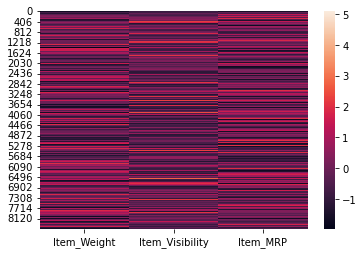

In [107]:
sns.heatmap(train[numerical_columns])

In [108]:
from sklearn.model_selection import train_test_split
y = train['Item_Outlet_Sales']
X = train.drop(columns =['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"Shape of X_train is : {X_train.shape}")
print(f"Shape of y_train is : {y_train.shape}")
print(f"Shape of X_test is : {X_test.shape}")
print(f"Shape of y_test is : {y_test.shape}")

Shape of X_train is : (6818, 32)
Shape of y_train is : (6818,)
Shape of X_test is : (1705, 32)
Shape of y_test is : (1705,)


In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

linreg.score(X_test,y_test)

0.5795972247952179

In [130]:
import xgboost as xgb
from sklearn.metrics import r2_score

xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)
r2_score(y_test,y_pred)

0.5338381746997707

In [133]:
xg_reg.score(X_test,y_test)

0.5338381746997707

In [115]:
#!pip install xgboost

In [136]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(xg_reg, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.53


In [137]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xg_reg, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.52


In [139]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [142]:
test_1 = test.copy()

In [141]:
test_1.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [143]:
test_1['Item_Weight'] = test_1['Item_Weight'].fillna(test_1['Item_Weight'].mean())
test_1['Outlet_Size'] = test_1['Outlet_Size'].fillna(test_1['Outlet_Size'].mode()[0])
test_1 = test_1.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'}})
test_1 = pd.get_dummies(data= test_1, columns =categorical_columns)
scaled = scaler.fit_transform(test_1[numerical_columns])
test_1[numerical_columns] = scaled
test_1.head(3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,1.897460,-1.134077,-0.536555,OUT049,1999,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,FDW14,-1.035530,-0.531850,-0.868937,OUT017,2007,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,NCN55,0.448634,0.661316,1.629848,OUT010,1998,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [144]:
test_1 = test_1.drop(columns =['Item_Identifier','Outlet_Identifier'])

In [153]:
submission_prediction = linreg.predict(test_1)
submission = test[['Item_Identifier','Outlet_Identifier']]
submission['Item_Outlet_Sales'] = abs(submission_prediction)
submission.to_csv(r'submission.csv',index=False)

C:\Users\hp\AppData\Local\Temp/ipykernel_16868/2864640396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Item_Outlet_Sales'] = abs(submission_prediction)


In [154]:
submission_prediction = xg_reg.predict(test_1)
submission = test[['Item_Identifier','Outlet_Identifier']]
submission['Item_Outlet_Sales'] = abs(submission_prediction)
submission.to_csv(r'submission.csv',index=False)

C:\Users\hp\AppData\Local\Temp/ipykernel_16868/1242956990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Item_Outlet_Sales'] = abs(submission_prediction)


## Using PIPELINE

In [2]:
!pip install category_encoders

In [3]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [4]:
data = pd.read_csv(r'train.csv')

train_x = data.drop(columns = ['Item_Outlet_Sales'])
train_y = data['Item_Outlet_Sales']

In [5]:
from sklearn.base import BaseEstimator

class OutletTypeEncoder(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, documents, y=None):
        return self
    
    def transform(self, x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
        x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier'] == 'OUT027')*1
        return x_dataset

In [6]:
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type'
                                                                       ]),
                                              ('impute_item_weight', SimpleImputer(strategy='mean'),
                                               ['Item_Weight']),
                                              ('scale_data', StandardScaler(),['Item_MRP'])])

In [7]:
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])